<a href="https://colab.research.google.com/github/pfjapena/Porfolio/blob/main/4_Reto_Parcial_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se procede con la carga de los datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB   #Modelo Gaussian Naive Bayes
from sklearn.tree import DecisionTreeClassifier  #Prestamo Interbibliotecario
from sklearn.cluster import KMeans

#Se procede con la estimación de la matriz de confusión
from sklearn.metrics import confusion_matrix

#Evaluamos la precision en el pronóstico
from sklearn import metrics

#Se procede con la gráfica de la distribución de probabilidad
import seaborn as sns

#Para cargar los archivos automáticamente del drive
from google.colab import drive
drive.mount('/content/drive')

#Esto es para el arbol de decisión
from sklearn.tree import export_graphviz  #Estructura del Arbol
from pydotplus import graph_from_dot_data #Que datos le voy a colocar al árbol

Mounted at /content/drive


1. Se procede con la carga de los datos y el análisis de las correlaciones

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

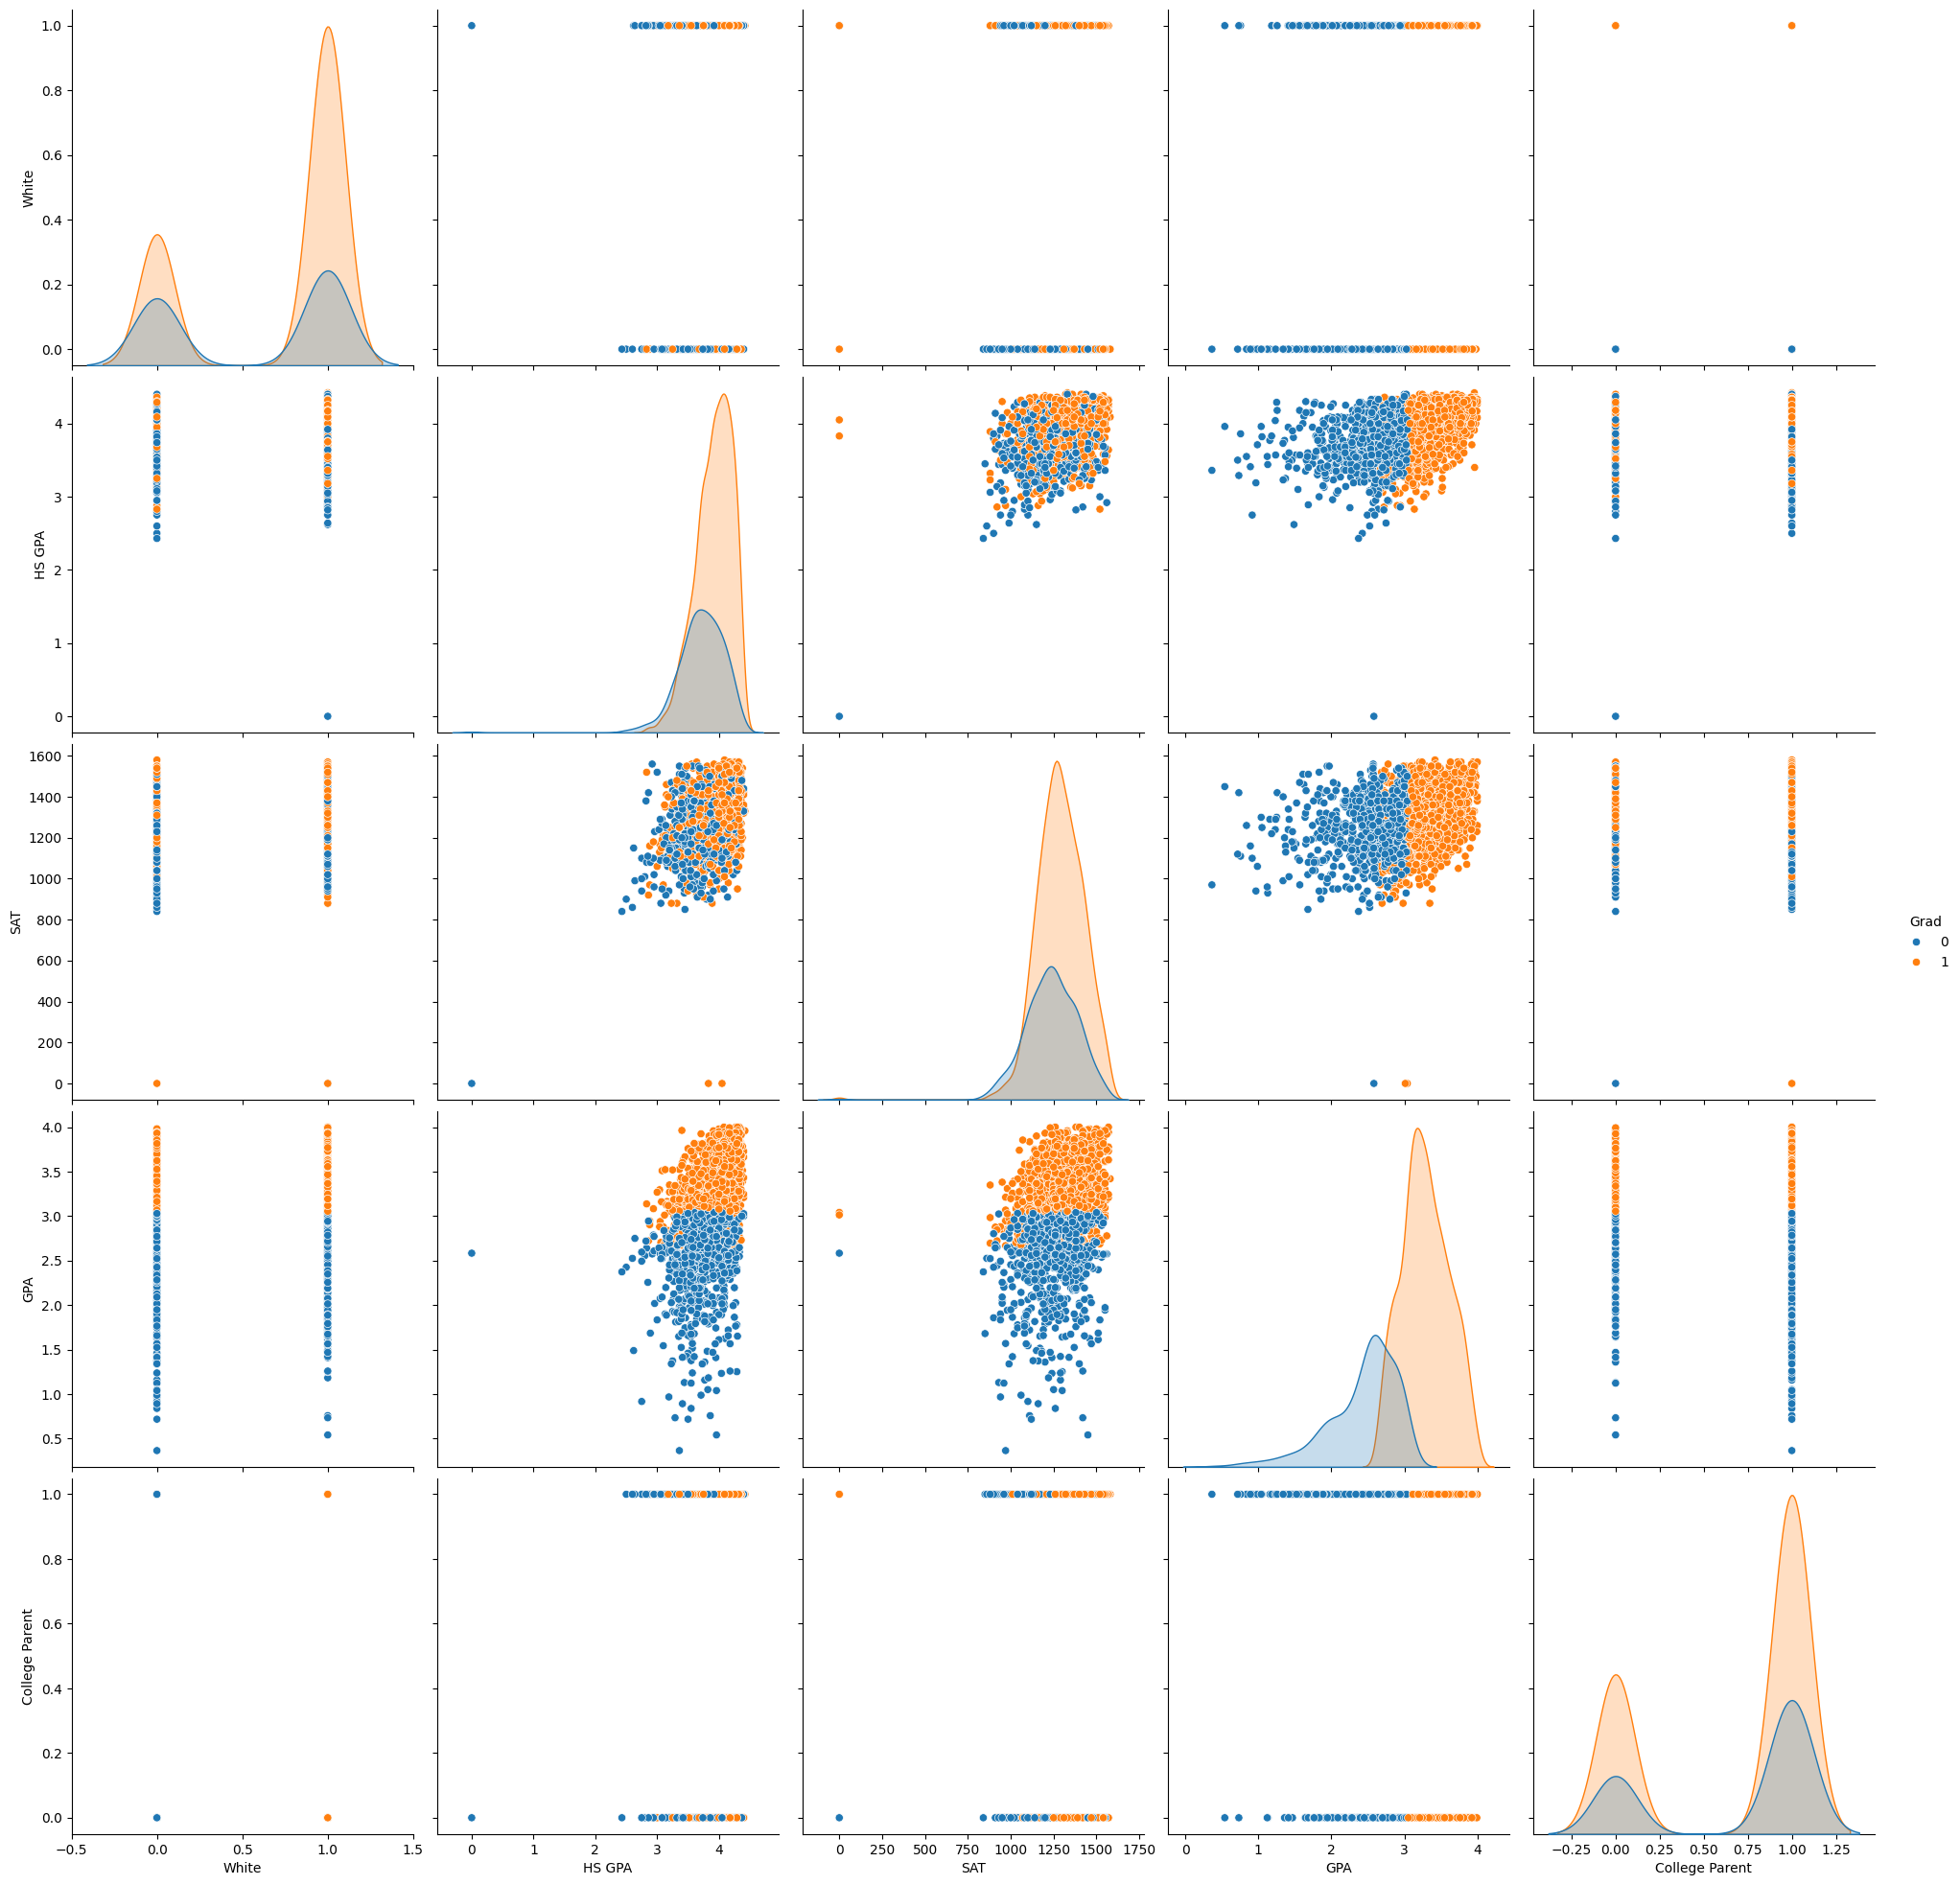

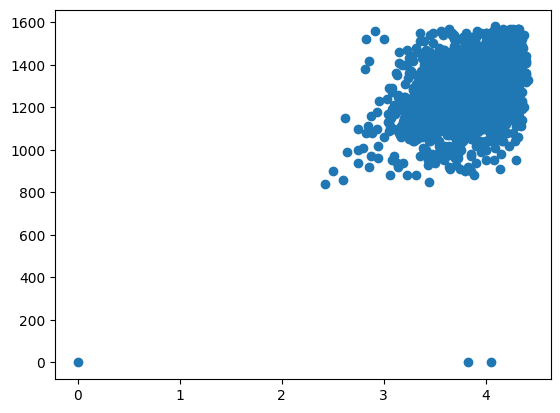

La matriz de correlación es:
                    White    HS GPA       SAT       GPA  College Parent  \
White           1.000000  0.130981  0.191930  0.194132       -0.005987   
HS GPA          0.130981  1.000000  0.346767  0.376932        0.020068   
SAT             0.191930  0.346767  1.000000  0.260927       -0.029768   
GPA             0.194132  0.376932  0.260927  1.000000       -0.015137   
College Parent -0.005987  0.020068 -0.029768 -0.015137        1.000000   
Grad            0.133612  0.283404  0.172794  0.726624       -0.018035   

                    Grad  
White           0.133612  
HS GPA          0.283404  
SAT             0.172794  
GPA             0.726624  
College Parent -0.018035  
Grad            1.000000  


In [ ]:
nxl='/content/drive/MyDrive/1. AnaliticaNegocios(02-2024)/4. BD_Parcial_L.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

#----------------------------------------------------
#Se procede con la carga de la base de datos
XD=np.array(XDB[["White","HS GPA","SAT","GPA","College Parent"]])
yd=np.array(XDB[['Grad']])

#Se procede a la exploración de cada una de las variables por variable deseada
plt.figure()
sns.pairplot(XDB.dropna(), hue='Grad',size=4,vars=["White","HS GPA","SAT","GPA","College Parent"],kind='scatter')
plt.show()

plt.figure()
plt.scatter(XD[:,1],XD[:,2])
plt.show()

#----------------------------------------------------
#Se procede a determinar el coeficiente de correlación
df=pd.DataFrame(np.column_stack((XD[:,0],XD[:,1],XD[:,2],XD[:,3],XD[:,4],yd)))
df.columns=["White","HS GPA","SAT","GPA","College Parent",'Grad']

#Se procede con la estimación del coeficiente de correlación
print("La matriz de correlación es:\n",df.corr())

2. Se procede con la construcción del modelo Naive Bayes

In [ ]:
#Analizamos los resultados arrojados por el modelo
mnb=GaussianNB()
mnb.fit(XD,yd)
ydp=mnb.predict(XD)    #Estos valores de pronóstico sirven para evaluar modeloº
u=mnb.theta_   #Son las medias
print("Las medias de las variables son:\n",u)
sigma=np.sqrt(mnb.var_)  #Obtengo las desviaciones
print("Los valores de las desviaciones son:\n",sigma)

#Se procede con el análisis de las variaciones de las variables
LS=u+sigma
print("Los limites superiores para las variables son:\n",LS)
LI=u-sigma
print("Los limites inferiores para las variables son:\n",LI)

#Prediciendo los valores de preaprobación del valor deseado
ydp=mnb.predict(XD)  #Hizo el pronóstico de la Preaprobación para los solicitantes

#Se procede con la evaluación del comportamiento del modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

print("La matriz de confusión es:\n",cm)
print("La Exactitud es:",(VP+VN)/(VP+VN+FP+FN))
print("El coeficiente de Sensibilidad es:",VP/(VP+FN))  #columna 1
print("El coeficiente de Especificidad es:",VN/(FP+VN)) #columna 2
#---------------------------------------------------------

#Predecir los solicitantes de la segunda hoja
XSC=pd.read_excel(nxl,sheet_name=1)
XSC=np.array(XSC[["White","HS GPA","SAT","GPA","College Parent"]])
ydsc=mnb.predict(XSC)
print("El pronóstico para los estudiantes es:",ydsc)

#Aquí creo que faltaría el pronóstico de los que no poseen puntaje
#y contar cuantos son positivos y cuantos osn negativos.

Las medias de las variables son:
 [[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
Los valores de las desviaciones son:
 [[  0.49256256   0.3769524  151.65529771   0.47599109   0.45912526]
 [  0.44848204   0.29253159 136.43844258   0.31766569   0.46653166]]
Los limites superiores para las variables son:
 [[1.07860152e+00 4.08635175e+00 1.38650919e+03 2.90727356e+00
  1.15717721e+00]
 [1.16958030e+00 4.20732928e+00 1.42498613e+03 3.60486872e+00
  1.14644495e+00]]
Los limites inferiores para las variables son:
 [[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
La matriz de confusión es:
 [[ 452  164]
 [ 102 1282]]
La matriz de confusión es:
 [[ 452  164]
 [ 102 1282]]
La Exactitud es: 0.867
El coeficiente de Sensibilidad es: 0.9263005780346821
El coeficiente de Especif

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3. Se procede con la construcción del modelo de Árbol

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4) #Tener en cuenta solo 4 niveles
mar.fit(XD,yd)
ydp=mar.predict(XD)    #Estos valores de pronóstico sirven para evaluar modelo

#Se procede con la evaluación del comportamiento del modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

print("La matriz de confusión es:\n",cm)
print("La Exactitud es:",(VP+VN)/(VP+VN+FP+FN))
print("El coeficiente de Sensibilidad es:",VP/(VP+FN))  #columna 1
print("El coeficiente de Especificidad es:",VN/(FP+VN)) #columna 2

#Se procede a gráficar el árbol. from sklearn.tree import export_graphviz  #Estructura del Arbol
from pydotplus import graph_from_dot_data #Que datos le voy a colocar al árbol

vs=["White","HS GPA","SAT","GPA","College Parent"]  #Estos nombres aparecen en el árbol

dot_data=export_graphviz(mar,feature_names=vs)  #Asegurar nombres del gráfico
graph=graph_from_dot_data(dot_data)                   #Se hace el gráfico del Árbol
graph.write_png('arbol.png')

# Este es el pronóstico para los nuevos individuos
ydscar=mar.predict(XSC)
print("El pronóstico para los estudiantes es:",ydscar)

#------------------------------------------------------
#Preguntas
#A que nodo pertenece cada uno de los individuos de la base de datos anterior
#Determinar el porcentaje de los nodos de finalización de estudios

La matriz de confusión es:
 [[ 422  194]
 [   2 1382]]
La matriz de confusión es:
 [[ 422  194]
 [   2 1382]]
La Exactitud es: 0.902
El coeficiente de Sensibilidad es: 0.9985549132947977
El coeficiente de Especificidad es: 0.685064935064935
El pronóstico para los estudiantes es: [0 1 1]


4. Se procede con la construcción del modelo KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


La estructura de lso centroides es la siguiente:
 [[4.64684015e-01 3.63951673e+00 1.05312268e+03 2.70508550e+00
  7.32342007e-01]
 [6.40794224e-01 3.80368231e+00 1.19072202e+03 2.97076354e+00
  6.85920578e-01]
 [7.72540984e-01 3.96206967e+00 1.44682377e+03 3.16286475e+00
  6.59836066e-01]
 [7.28862974e-01 3.90004373e+00 1.30469388e+03 3.09267201e+00
  6.85131195e-01]
 [6.66666667e-01 2.62666667e+00 2.27373675e-13 2.87900000e+00
  6.66666667e-01]]
La matriz de confusión es:
 [[138 183 118 176   1]
 [131 371 370 510   2]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
La Exactitud es: 0.6184690157958688
El coeficiente de Sensibilidad es: 0.7390438247011952
El coeficiente de Especificidad es: 0.42990654205607476
La estructura de los cluster es la siguiente:
      0    1    2
0  269  138  131
1  554  183  371
2  488  118  370
3  686  176  510
4    3    1    2
El pronóstico para los estudiantes es: [3 0 1]


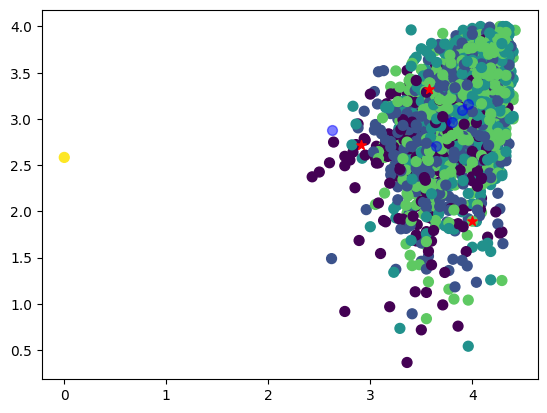

In [ ]:
np.random.seed(42)

k = 5
mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)
labels = mkm.labels_
centroids = mkm.cluster_centers_

print('La estructura de lso centroides es la siguiente:\n',centroids)

ydp=mkm.predict(XD)
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1]
FN=cm[1,0];VP=cm[1,1]

print("La Exactitud es:",(VP+VN)/(VP+VN+FP+FN))
print("El coeficiente de Sensibilidad es:",VP/(VP+FN))  #columna 1
print("El coeficiente de Especificidad es:",VN/(FP+VN)) #columna 2

counts_1 = np.bincount(labels)
XDB["cluster"]=labels

#Importante, aquí se cuentan los positivos y los negativos por cada cluster
counts_2 = XDB.groupby("cluster").agg({"Grad": lambda x: (x == 0).sum()})
counts_3 = XDB.groupby("cluster").agg({"Grad": lambda x: (x == 1).sum()})

df=pd.DataFrame(np.column_stack((counts_1,counts_2,counts_3)))
print('La estructura de los cluster es la siguiente:\n',df)

#Se procede con el pronóstico de un solo individuo
# Este es el pronóstico para los nuevos individuos
ydsckm=mkm.predict(XSC)
print("El pronóstico para los estudiantes es:",ydsckm)

plt.figure()
plt.scatter(XD[:, 1], XD[:, 3], c=labels, s=50, cmap='viridis')
plt.scatter(XSC[:,1],XSC[:,3],marker='*',s=50,facecolors='red')
plt.scatter(centroids[:,1],centroids[:,3],alpha=0.5,marker='o',s=50,facecolors='blue')
plt.show()